In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics.pairwise import pairwise_distances
from scipy import sparse

from ripser import ripser
from persim import plot_diagrams
import tadasets

In [4]:
def makeSparseDM(X, thresh):
    N = X.shape[0]
    D = pairwise_distances(X, metric='euclidean')
    [I, J] = np.meshgrid(np.arange(N), np.arange(N))
    I = I[D <= thresh]
    J = J[D <= thresh]
    V = D[D <= thresh]
    return sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()

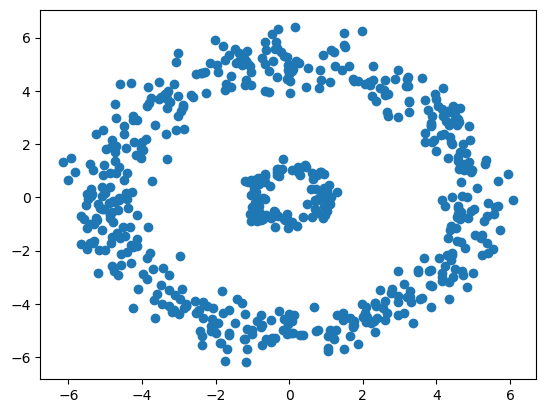

In [5]:
data = np.concatenate([
    tadasets.dsphere(n=500, d=1, r=5, noise=0.5),
    tadasets.dsphere(n=100, d=1, r=1, noise=0.2)
])

plt.scatter(data[:,0], data[:,1])

In [7]:
thresh = 1.5
results0 = ripser(data, thresh = thresh, maxdim=1)

D = makeSparseDM(data, thresh)
results1 = ripser(D, distance_matrix=True)

print("%i edges added in the dense filtration"%results0['num_edges'])
print("%i edges added in the sparse filtration"%results1['num_edges'])

12958 edges added in the dense filtration
12958 edges added in the sparse filtration


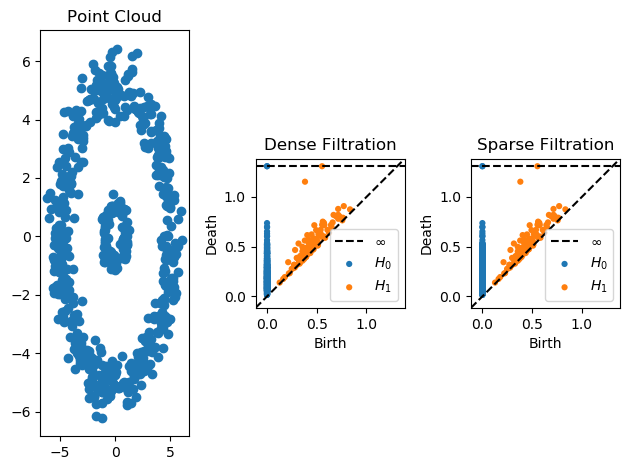

In [8]:
plt.subplot(131)
plt.scatter(data[:, 0], data[:, 1])
plt.title("Point Cloud")
plt.subplot(132)
plot_diagrams(results0['dgms'], show=False)
plt.title("Dense Filtration")
plt.subplot(133)
plt.title("Sparse Filtration")
plot_diagrams(results1['dgms'], show=False)
plt.tight_layout()
plt.show()